Logit Regression for Credit Default

# 3.1 Apply the Logit regression to create a predictive model for credit card defaults

In [56]:
# Importing required libraries
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
# Loading the Data
data = pd.read_csv('credit_card_default.csv')

In [58]:
# EDA - Basic Information about the data
print(data.info())
print(data.describe())
print("Current columns in the dataset:")
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  30000 non-null  int64
 1   LIMIT_BAL           30000 non-null  int64
 2   SEX                 30000 non-null  int64
 3   EDUCATION           30000 non-null  int64
 4   MARRIAGE            30000 non-null  int64
 5   AGE                 30000 non-null  int64
 6   PAY_0               30000 non-null  int64
 7   PAY_2               30000 non-null  int64
 8   PAY_3               30000 non-null  int64
 9   PAY_4               30000 non-null  int64
 10  PAY_5               30000 non-null  int64
 11  PAY_6               30000 non-null  int64
 12  BILL_AMT1           30000 non-null  int64
 13  BILL_AMT2           30000 non-null  int64
 14  BILL_AMT3           30000 non-null  int64
 15  BILL_AMT4           30000 non-null  int64
 16  BILL_AMT5           30000 non-null  int6

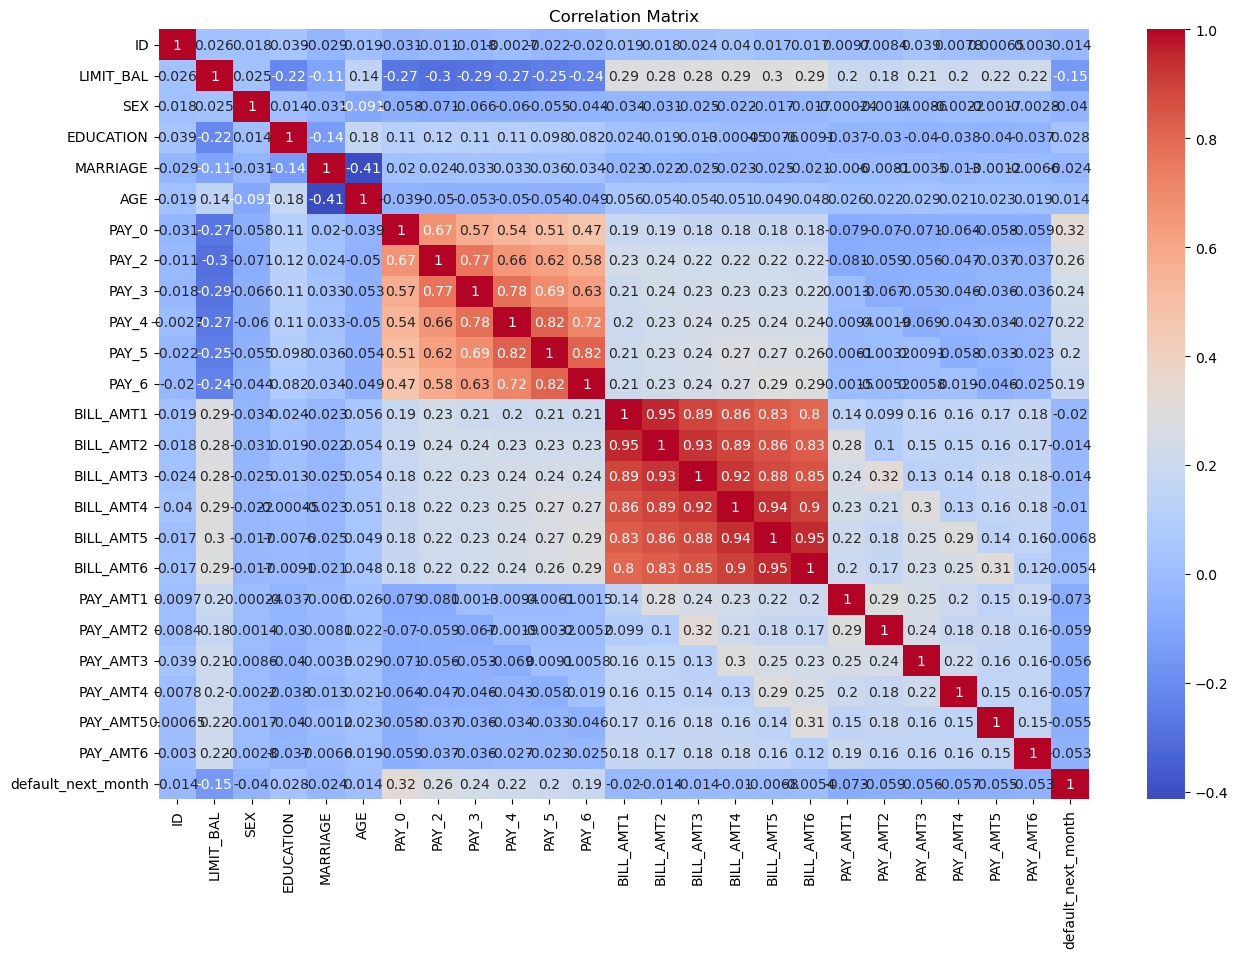

In [59]:
# Visualizing the correlations
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Key Observation on the Heatmap:
- Payment Status (PAY_0 to PAY_6): Most significant predictors of default_next_month, with recent payment behavior (especially PAY_0) showing a stronger association with the target variable.
- LIMIT_BAL: Shows a modest negative association. Indicating that individuals with higher credit limits are less likely to default
- Bill Amounts: Although these amounts are highly correlated with each other. It suggests that individuals who have higher bills in one month often have higher bills in other months. This pattern may indicate consistent spending behavior over time.
- Demographic features (Age, Sex, Education, Marriage) has less correlation with the default_next_month.

This heatmap suggests that PAY_0 (and possibly other PAY features) are essential for predicting defaults, while LIMIT_BAL and some demographic information might contribute but are not primary indicators.

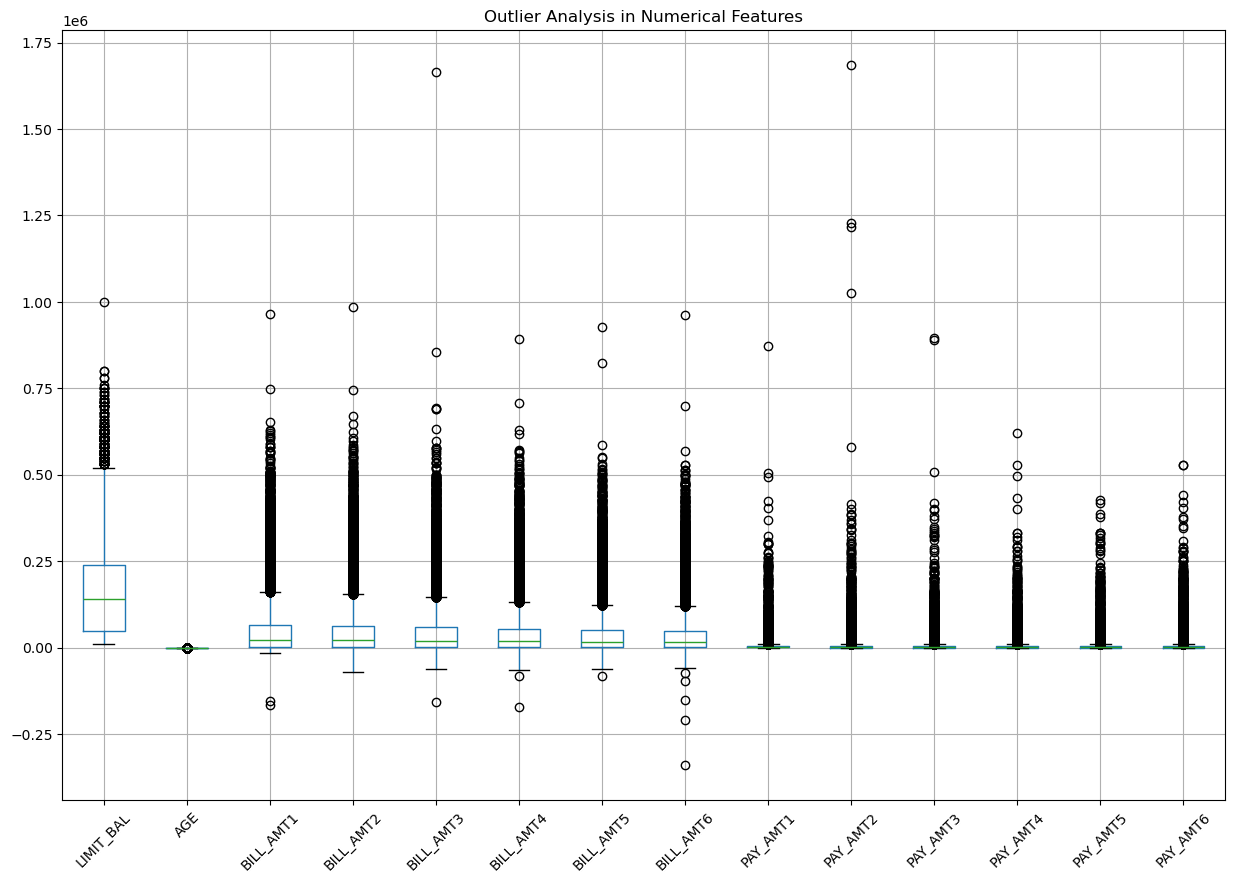

In [60]:
# Data Cleaning - Outlier Analysis in Numerical Columns
plt.figure(figsize=(15, 10))
data.boxplot(column=[
    'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
    'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
])
plt.xticks(rotation=45)
plt.title("Outlier Analysis in Numerical Features")
plt.show()

The outliers observed in Balance Limit, or various Bill Amounts are from diversified financial behaviors. I will not remove them at this moment to keep the critical information intact.

In [61]:
# Encoding Categorical Variables
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [62]:
# Normalizing Numerical Columns
numerical_features = [
    'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
    'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

# Scaling
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [63]:
# Splitting the Data into Training and Test Sets
train_data = data.iloc[:20000]
test_data = data.iloc[20000:]

X_train = train_data.drop(columns=['ID', 'default_next_month'])
y_train = train_data['default_next_month']
X_test = test_data.drop(columns=['ID', 'default_next_month'])
y_test = test_data['default_next_month']

In [64]:
# Training the Logistic Regression Model
logit_model = LogisticRegression(max_iter=1000, random_state=42)
logit_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [65]:
# Making Predictions and Evaluating the Model for the original train-test split
y_pred = logit_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy for Original Train-Test split:", accuracy)
print("Classification Report for Original Train-Test split:\n", classification_rep)

Accuracy for Original Train-Test split: 0.8207
Classification Report for Original Train-Test split:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      7922
           1       0.73      0.22      0.33      2078

    accuracy                           0.82     10000
   macro avg       0.78      0.60      0.61     10000
weighted avg       0.81      0.82      0.78     10000



# Overall Model Accuracy
The model achieved an accuracy of 82.07% on the test data. This means that about 82% of the predictions (defaults and non-defaults) were correct.

# Class-wise Performance
Class 0 (Non-defaults):
 - Precision: 0.83 – The model is correct on predicting 'non-defaults' 83% of the time.
 - Recall: 0.98 – Among all actual non-defaults, the model correctly identifies 98% of them.
 - F1-score: 0.90 – This combines precision and recall, indicating strong performance in predicting non-defaults.

Class 1 (Defaults):
 - Precision: 0.73 – When the model predicts a default, it's correct 73% of the time.
 - Recall: 0.22 – The model identifies only 22% of actual defaults, meaning it misses a significant portion.
 - F1-score: 0.33 – This low score suggests that while the model can predict defaults, it struggles to capture all actual defaults.

# Averages
 - Macro Avg: This is the unweighted average of the scores for each class. The recall score (0.60) shows a significant imbalance in the model’s ability to detect each class, with better performance on non-defaults than defaults.
 - Weighted Avg: This average is weighted by the number of instances in each class, and it’s closer to the model's accuracy, reflecting that non-defaults are the majority.

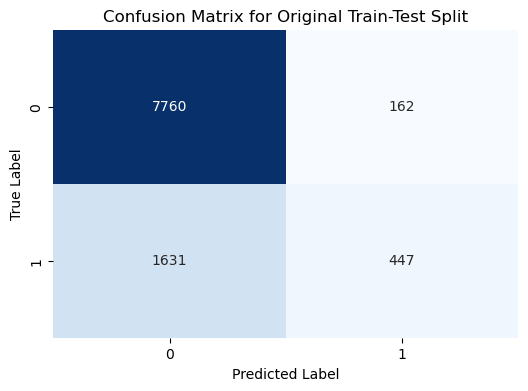

In [66]:
# Confusion matrix for the original train-test split
cm_original = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(cm_original, "Confusion Matrix for Original Train-Test Split")

C:\Users\mtawh\AppData\Local\Temp\ipykernel_25136\1222699439.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x='Importance', data=feature_importance, palette="viridis")


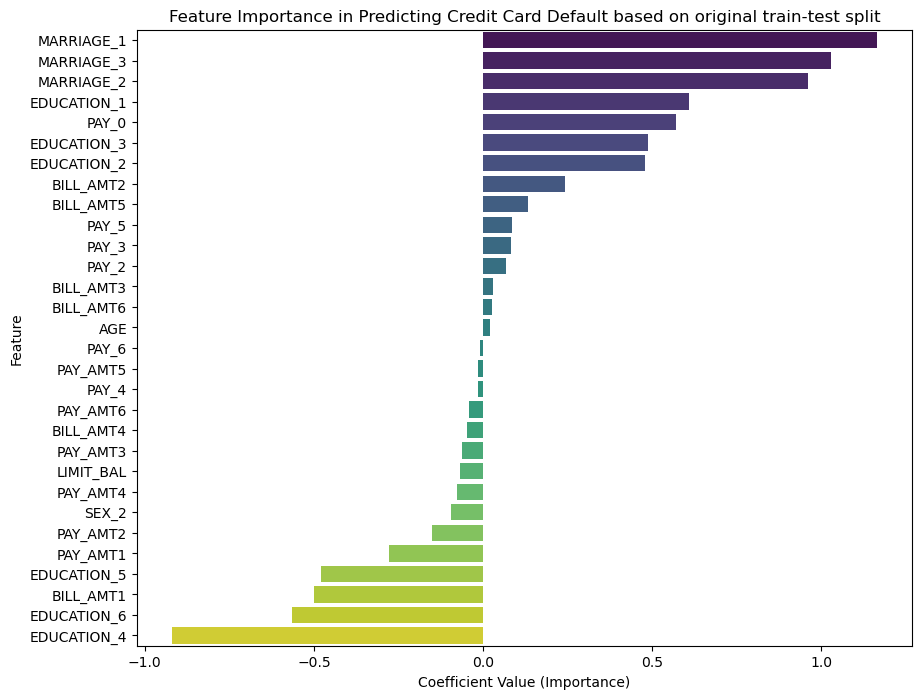

In [67]:
# Feature Importance Visualization for original train-test split
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': logit_model.coef_[0]
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(y='Feature', x='Importance', data=feature_importance, palette="viridis")
plt.title("Feature Importance in Predicting Credit Card Default based on original train-test split")
plt.xlabel("Coefficient Value (Importance)")
plt.ylabel("Feature")
plt.show()

- Positive coefficient: Marital Status (1, 2, 3), certain Education levels (1, 2, 3), Late Repayment Status (Pay_0), and Bill Amounts (2, 5) increase the probability of default.
- Negative coefficient: Certain Educational levels (4, 5, 6), Bill Amount 1, Amounts paid in previous months (1, 2), and higher credit limit decrease the probability of default.

# 3.2 Changing the Train-Test sample. The last 20000 rows to be the Train Sample and the first 10000 the Test set. Any differences in results (if any) to be highlighted

In [68]:
# New Train-Test Split (Last 20,000 rows for training, first 10,000 rows for testing)
train_data_new = data.iloc[10000:]
test_data_new = data.iloc[:10000]

# Separating features (X) and target (y)
X_train_new = train_data_new.drop(columns=['ID', 'default_next_month'])
y_train_new = train_data_new['default_next_month']
X_test_new = test_data_new.drop(columns=['ID', 'default_next_month'])
y_test_new = test_data_new['default_next_month']

In [69]:
# Training the Logistic Regression Model on the New Train-Test Split
logit_model_new = LogisticRegression(max_iter=1000, random_state=42)
logit_model_new.fit(X_train_new, y_train_new)

LogisticRegression(max_iter=1000, random_state=42)

In [70]:
# Making Predictions and Evaluating the Model
y_pred_new = logit_model_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
classification_rep_new = classification_report(y_test_new, y_pred_new)

# Displaying the New Accuracy and Classification Report
print("Accuracy for new Train-Test split:", accuracy_new)
print("Classification Report for new Train-Test split:\n", classification_rep_new)

Accuracy for new Train-Test split: 0.8027
Classification Report for new Train-Test split:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      7741
           1       0.68      0.24      0.36      2259

    accuracy                           0.80     10000
   macro avg       0.75      0.60      0.62     10000
weighted avg       0.78      0.80      0.76     10000



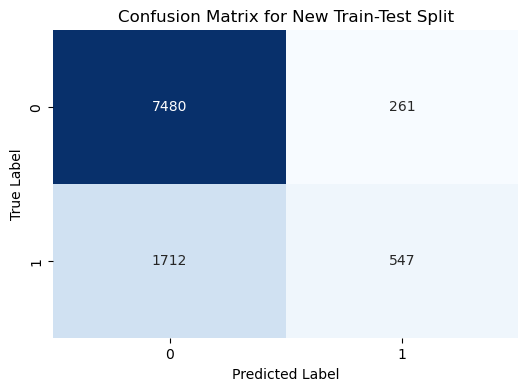

In [71]:
# Confusion matrix for the new train-test split
cm_new = confusion_matrix(y_test_new, y_pred_new)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(cm_new, "Confusion Matrix for New Train-Test Split")

C:\Users\mtawh\AppData\Local\Temp\ipykernel_25136\616033881.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x='Importance', data=feature_importance, palette="viridis")


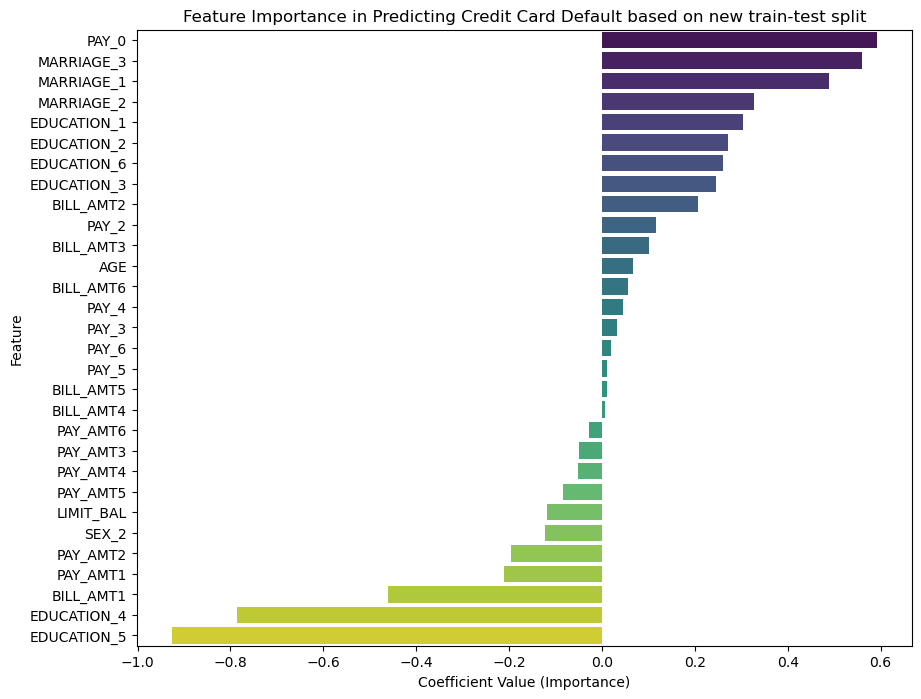

In [72]:
# Feature Importance Visualization for new split
feature_importance = pd.DataFrame({
    'Feature': X_train_new.columns,
    'Importance': logit_model_new.coef_[0]
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(y='Feature', x='Importance', data=feature_importance, palette="viridis")
plt.title("Feature Importance in Predicting Credit Card Default based on new train-test split")
plt.xlabel("Coefficient Value (Importance)")
plt.ylabel("Feature")
plt.show()

# Visualizing two models evaluations and predictions side by side

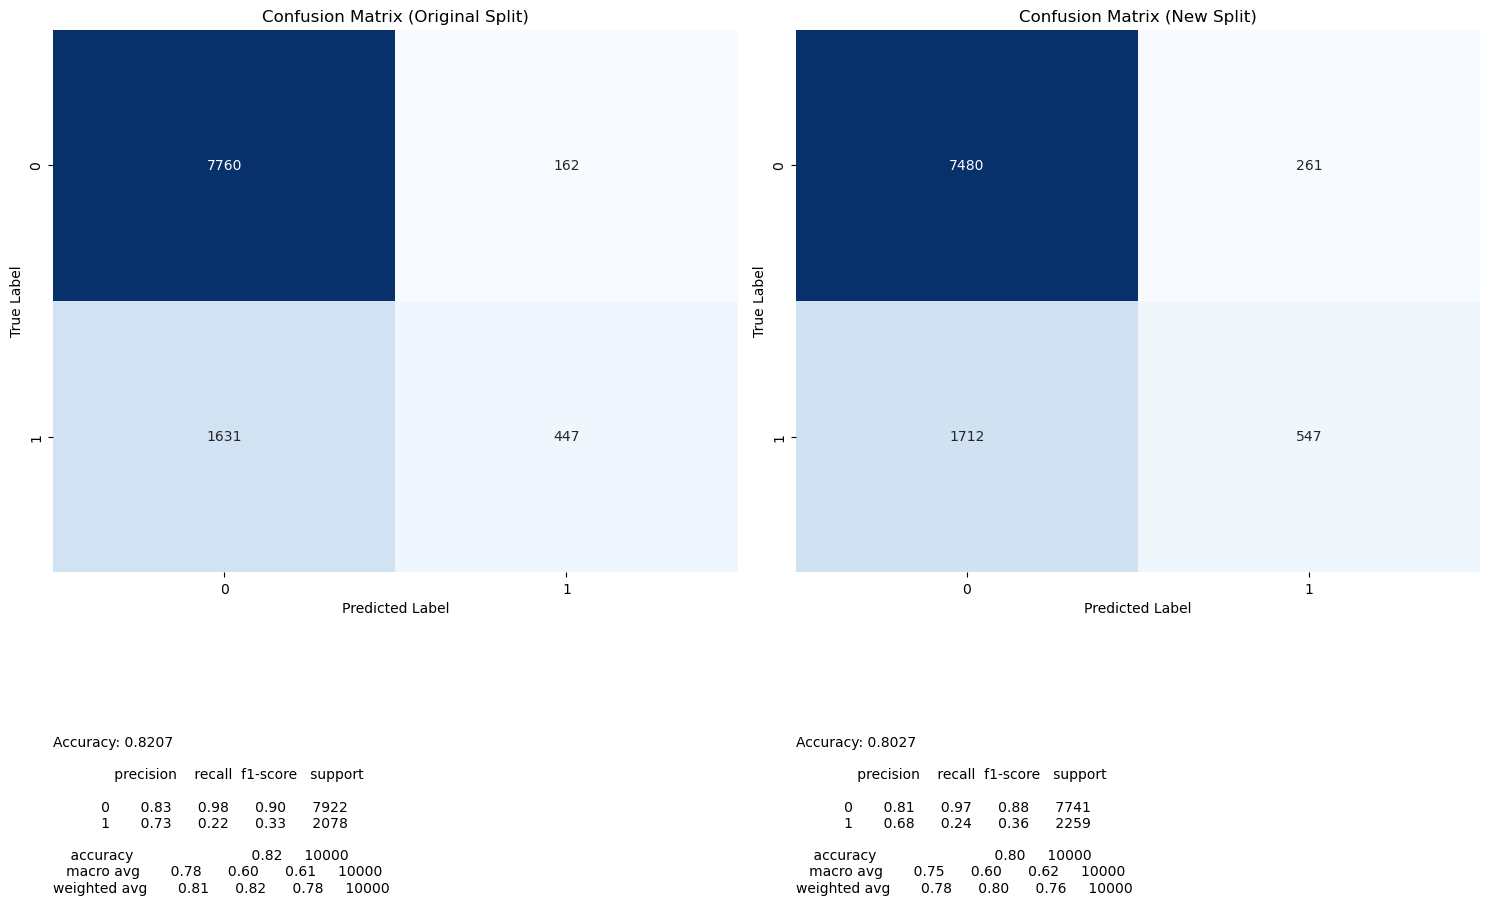

C:\Users\mtawh\AppData\Local\Temp\ipykernel_25136\65636244.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x='Importance', data=feature_importance_original, palette="viridis", ax=axes[0])
C:\Users\mtawh\AppData\Local\Temp\ipykernel_25136\65636244.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x='Importance', data=feature_importance_new, palette="viridis", ax=axes[1])


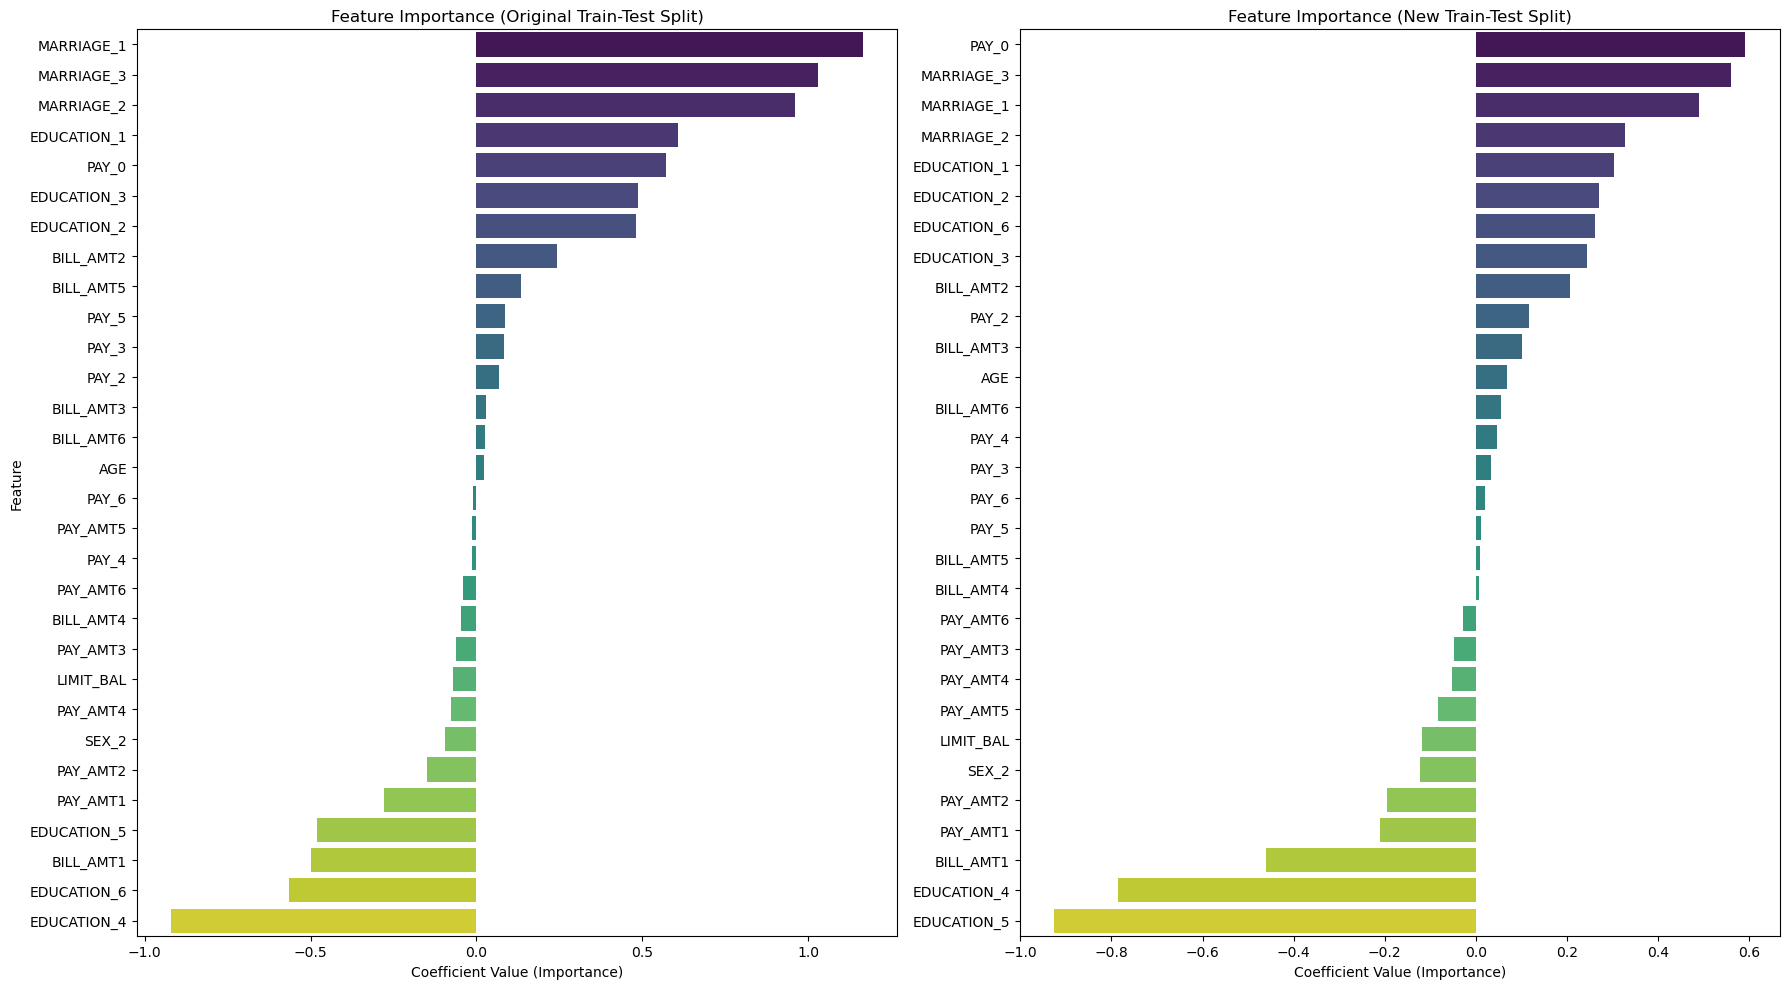

In [73]:
# Confusion matrices for both splits
cm_original = confusion_matrix(y_test, y_pred)
cm_new = confusion_matrix(y_test_new, y_pred_new)

# Evaluation metrics as text
accuracy_original = accuracy_score(y_test, y_pred)
classification_rep_original = classification_report(y_test, y_pred)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
classification_rep_new = classification_report(y_test_new, y_pred_new)

# Plotting confusion matrices and evaluation side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Confusion matrix for the original train-test split
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix (Original Split)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Display model evaluation for the original split
axes[0].text(0, -0.3, f"Accuracy: {accuracy_original:.4f}\n\n{classification_rep_original}",
             ha='left', va='top', fontsize=10, transform=axes[0].transAxes)

# Confusion matrix for the new train-test split
sns.heatmap(cm_new, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_title("Confusion Matrix (New Split)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Display model evaluation for the new split
axes[1].text(0, -0.3, f"Accuracy: {accuracy_new:.4f}\n\n{classification_rep_new}",
             ha='left', va='top', fontsize=10, transform=axes[1].transAxes)

plt.tight_layout()
plt.show()


# Visualizing two Feature Importance plots side by side for comparison

# Feature importance for the original split
feature_importance_original = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': logit_model.coef_[0]
}).sort_values(by='Importance', ascending=False)

# Feature importance for the new split
feature_importance_new = pd.DataFrame({
    'Feature': X_train_new.columns,
    'Importance': logit_model_new.coef_[0]
}).sort_values(by='Importance', ascending=False)

# Setting up the subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plotting feature importance for the original split
sns.barplot(y='Feature', x='Importance', data=feature_importance_original, palette="viridis", ax=axes[0])
axes[0].set_title("Feature Importance (Original Train-Test Split)")
axes[0].set_xlabel("Coefficient Value (Importance)")
axes[0].set_ylabel("Feature")

# Plotting feature importance for the new split
sns.barplot(y='Feature', x='Importance', data=feature_importance_new, palette="viridis", ax=axes[1])
axes[1].set_title("Feature Importance (New Train-Test Split)")
axes[1].set_xlabel("Coefficient Value (Importance)")
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

# Observation from two Feature Importances

- Coefficients that stay strong positive in both models: Positive coefficients: PAY_0 (very strong in both splits), Marital Status (1, 2, 3), Education (1, 2, 3), BILL_AMT2 and BILL_AMT3

- Coefficients that stay strong negative in both models: EDUCATION_4, EDUCATION_5, LIMIT_BAL, BILL_AMT1, PAY_AMT1 to PAY_AMT5.
  
- Significant change of coefficient: EDUCATION_6 has now moved from strong negative to strong positive, and PAY_4 has moved from slight negative to slight positive.  

# Summary of differences between two models:
 - Slight Decrease in Overall Accuracy and Non-default Precision: The new split resulted in a minor drop in the model's ability to predict non-defaults accurately.
 - Slight Improvement in Default Recall and F1-score: The new split marginally improved the model's ability to identify defaults, as seen in the recall and F1-score for class1.

- True Negatives: Both models can identify non-defaults, however there is a slight decrease (from 7760 to 7480) in the new model.
- False Positives: The new model incorrectly flagged more non-defaulters (from 162 to 261) as defaulters which could be an issue in a practical scenario if too many clients are flagged as high-risk when they are not.
- False Negatives: This slight increase (from 1631 to 1712) in false negatives with the new split indicates that the model is missing more defaults which is concerning. This rate is already high, and a further increase is definite concerning.
- True Positives: The new split improved in identifying more defaults (from 447 to 547) which is very beneficial.

# Overall Accuracy
The accuracy decreased slightly (by ~1.8%) when using the new train-test split. This indicates a slight drop in overall prediction correctness for the new split.
 - Original Train-Test Split: 82.07%
 - New Train-Test Split: 80.27%

# Class 0 (Non-default) Performance:
- Precision: Decreased by 2% for non-defaults, meaning the model was slightly less accurate when predicting non-defaults in the new split.
  * Original Split: 0.83
  * New Split: 0.81

- Recall: Remains very high for non-defaults in both splits, with a minor decrease in the new split.
  * Original Split: 0.98
  * New Split: 0.97

- F1-score: Decreased slightly, reflecting the small drop in precision and recall.
  * Original Split: 0.90
  * New Split: 0.88

# Class 1 (Default) Performance
- Precision: Precision dropped by 5% in the new split, indicating that the model was less precise when predicting defaults.
  * Original Split: 0.73
  * New Split: 0.68

- Recall: Improved slightly for defaults, meaning the new split helped the model identify a marginally higher percentage of actual defaults (24% vs. 22%).
  * Original Split: 0.22
  * New Split: 0.24

- F1-score: Improved slightly for defaults, suggesting a minor improvement in the model's ability to balance precision and recall for defaults.
  * Original Split: 0.33
  * New Split: 0.36

# Averages
- Macro Avg: Quite similar across splits, though the F1-score for the new split is marginally higher, indicating a small improvement in balance across classes.
  * Original Split: 0.60 recall, 0.61 F1-score
  * New Split: 0.60 recall, 0.62 F1-score

- Weighted Avg: Decreased slightly in the new split, reflecting the overall drop in performance for non-default predictions.
  * Original Split: 0.82 recall, 0.78 F1-score
  * New Split: 0.80 recall, 0.76 F1-score

** Note: My suggested approach: Overall, the dataset is imbalanced with more non-defaults than defaults (which is expected), therfore the model tends to favor the majority class. I will use Class Weight and Hyper Parameter Tuning to see if those help improve the performance..

Accuracy (with class_weight='balanced'): 0.6733
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.76      7741
           1       0.37      0.63      0.47      2259

    accuracy                           0.67     10000
   macro avg       0.62      0.66      0.62     10000
weighted avg       0.75      0.67      0.70     10000



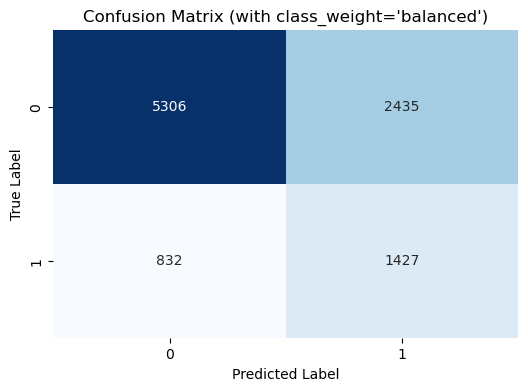

In [74]:
# Logistic Regression with Class Weight Balancing
logit_model_weighted = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logit_model_weighted.fit(X_train_new, y_train_new)

# Making Predictions and Evaluating the Model
y_pred_weighted = logit_model_weighted.predict(X_test_new)
accuracy_weighted = accuracy_score(y_test_new, y_pred_weighted)
classification_rep_weighted = classification_report(y_test_new, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test_new, y_pred_weighted)

# Displaying the results
print("Accuracy (with class_weight='balanced'):", accuracy_weighted)
print("Classification Report:\n", classification_rep_weighted)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_weighted, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (with class_weight='balanced')")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


- True Positive Rate (Recall for Defaults): The true positive rate (recall for class 1) improved with class_weight='balanced'. Out of all actual defaults (1,427 + 832 = 2,259), the model successfully identified 1,427, which is approximately 63.2%. This is a significant improvement over previous results without balanced class weights.
- False Positive Rate: The number of false positives increased to 2,435, indicating that the model is now predicting more non-defaulters as defaulters. This increase in false positives is a trade-off for achieving better recall for defaults.
- False Negatives: The false negatives have decreased compared to the unweighted model. By reducing the number of missed defaults, the model is better suited for applications where identifying potential defaulters is critical.

Practical Implications: In a credit risk scenario, this model is now more sensitive to defaults, catching more high-risk cases (higher TP). However, the increase in false positives (FP) means more clients are incorrectly flagged as high-risk, which might lead to additional scrutiny or intervention for these clients.
This balance might be acceptable if the business prioritizes reducing missed defaults (FN) and is willing to accept more false positives as a trade-off.

--------------------------------------------------------------------------------------------------------------------------------------------------------
End of Part 3